# Recopilatorio con Decission Tree

In [24]:
import pandas as pd
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Populating the interactive namespace from numpy and matplotlib


In [14]:
# Cargamos los datos que hemos procesado en R
df= pd.read_csv("C://Master Data Science/Master en Data Science/TFM/Transacciones de Banco Checo/DFTenenciaProductos.csv")

In [ ]:
df1_original=df[['frequency', 'sex_owner','sex_disponent', 'Ord_Insurance','Ord_Insurance_amount','Ord_Household_Payment',
        'Ord_Household_Payment_amount','Ord_Loan_Payment','Ord_Loan_Payment_amount','Ord_Leasing','Ord_Leasing_amount',
        'Ord_Empty','Ord_Empty_amount']] 

In [152]:
#Tomamos un primer subconjunto de variables de prueba
df1=df[['frequency', 'sex_owner','sex_disponent', 'Ord_Insurance','Ord_Insurance_amount','Ord_Household_Payment',
        'Ord_Household_Payment_amount','Ord_Leasing','Ord_Leasing_amount','Ord_Empty','Ord_Empty_amount', 'avg_salary']]

# 'municip < 499','municip 500-1999','municip 2000-9999','municip > 10000','num_cities','ratio_urban_inhabitants',
#        'unemployment_rate_95','unemployment_rate_96','entrepreneurs'
#'entrepreneurs_ratio',
       # 'unemployment_rate_95','unemployment_rate_96', 'avg_salary','unemployment_rate_95','unemployment_rate_96'
    #'num_inhabitants', 'avg_salary'

In [2]:
from imblearn.over_sampling import SMOTE

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import SMOTENC  HAY QUE VER PORQUE NO CARGA¡¡¡¡¡

In [153]:
df2=pd.get_dummies(df1)

In [88]:
df2.dtypes

Ord_Insurance                     int64
Ord_Insurance_amount              int64
Ord_Household_Payment             int64
Ord_Household_Payment_amount      int64
Ord_Leasing                       int64
Ord_Leasing_amount              float64
Ord_Empty                         int64
Ord_Empty_amount                  int64
num_inhabitants                   int64
municip < 499                     int64
municip 500-1999                  int64
municip 2000-9999                 int64
municip > 10000                   int64
num_cities                        int64
ratio_urban_inhabitants         float64
avg_salary                        int64
unemployment_rate_95            float64
unemployment_rate_96            float64
entrepreneurs                     int64
crimes_95                       float64
crimes_96                         int64
crimes_95_ratio                 float64
crimes_96_ratio                 float64
entrepreneurs_ratio             float64
frequency_After_trans             uint8


In [154]:
X = df2
y = df["account_loan_bin"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<function matplotlib.pyplot.show(*args, **kw)>

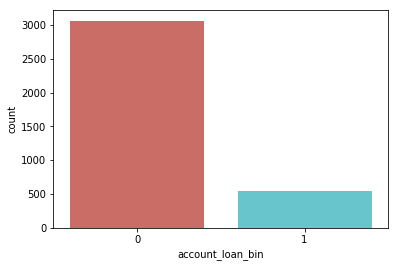

In [90]:
#Las clases de train están desbalanceadas
y_train2=pd.DataFrame(y_train)
sns.countplot(x="account_loan_bin",data=y_train2, palette='hls')
plt.show

In [155]:
#Para hacer SMOTE y balancear las clases
os = SMOTE(random_state=0)
columns = X_train.columns
os_X_train,os_y_train=os.fit_sample(X_train, y_train)
os_X_train = pd.DataFrame(data=os_X_train,columns=columns )
os_y_train= pd.DataFrame(data=os_y_train,columns=['account_loan_bin'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_X_train))
print("Number of loans=0 in oversampled data",len(os_y_train[os_y_train['account_loan_bin']==0]))
print("Number of loans=1",len(os_y_train[os_y_train['account_loan_bin']==1]))
print("Proportion of loans=0 is ",len(os_y_train[os_y_train['account_loan_bin']==0])/len(os_X_train))
print("Proportion of loans=1 is ",len(os_y_train[os_y_train['account_loan_bin']==1])/len(os_X_train))

length of oversampled data is  6122
Number of loans=0 in oversampled data 3061
Number of loans=1 3061
Proportion of loans=0 is  0.5
Proportion of loans=1 is  0.5


# Vamos a probar con un árbol normal

In [259]:
clf_tree = DecisionTreeClassifier(min_samples_leaf=5,max_depth=3)

In [260]:
clf_tree.fit(os_X_train,os_y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [261]:
#Predicción en el conjunto de train con un árbol de prueba
print("El accuracy es",accuracy_score(os_y_train,clf_tree.predict(os_X_train))*100,"%")
print("La precision es",precision_score(os_y_train,clf_tree.predict(os_X_train))*100, "%")
print("El recall es",recall_score(os_y_train,clf_tree.predict(os_X_train))*100,"%")
print("Matriz de confusión",confusion_matrix(os_y_train,clf_tree.predict(os_X_train)))
tn, fp, fn, tp=confusion_matrix(os_y_train,clf_tree.predict(os_X_train)).ravel()
(tn, fp, fn, tp)

El accuracy es 76.67428944789285 %
La precision es 91.34177215189874 %
El recall es 58.934988565828164 %
Matriz de confusión [[2890  171]
 [1257 1804]]


(2890, 171, 1257, 1804)

In [262]:
#Predicción en el conjunto de test con un árbol de test
print("El accuracy es",accuracy_score(y_test,clf_tree.predict(X_test))*100,"%")
print("La precision es",precision_score(y_test,clf_tree.predict(X_test))*100, "%")
print("El recall es",recall_score(y_test,clf_tree.predict(X_test))*100,"%")
print("Matriz de confusión",confusion_matrix(y_test,clf_tree.predict(X_test)))
tn, fp, fn, tp=confusion_matrix(y_test,clf_tree.predict(X_test)).ravel()
(tn, fp, fn, tp)

El accuracy es 82.22222222222221 %
La precision es 38.35616438356164 %
El recall es 19.58041958041958 %
Matriz de confusión [[712  45]
 [115  28]]


(712, 45, 115, 28)

0.5681795087343304


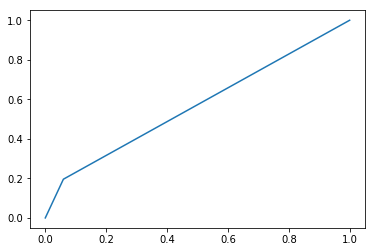

In [263]:
#Seguimos la evaluación del modelo en el dataset de test
from sklearn.metrics import roc_curve, auc
# We chose the target
target_pos = 1 # Or 0 for the other class
fp,tp,_ = roc_curve(y_test,clf_tree.predict(X_test))
plt.plot(fp,tp)
print(auc(fp,tp))

In [162]:
X_train.columns.values.tolist()

['Ord_Insurance',
 'Ord_Insurance_amount',
 'Ord_Household_Payment',
 'Ord_Household_Payment_amount',
 'Ord_Leasing',
 'Ord_Leasing_amount',
 'Ord_Empty',
 'Ord_Empty_amount',
 'avg_salary',
 'frequency_After_trans',
 'frequency_Monthly',
 'frequency_Weekly',
 'sex_owner_F',
 'sex_owner_M',
 'sex_disponent_F',
 'sex_disponent_M']

In [229]:
unique(X_train.loc[:,"frequency_Monthly"])

array([0, 1], dtype=uint8)

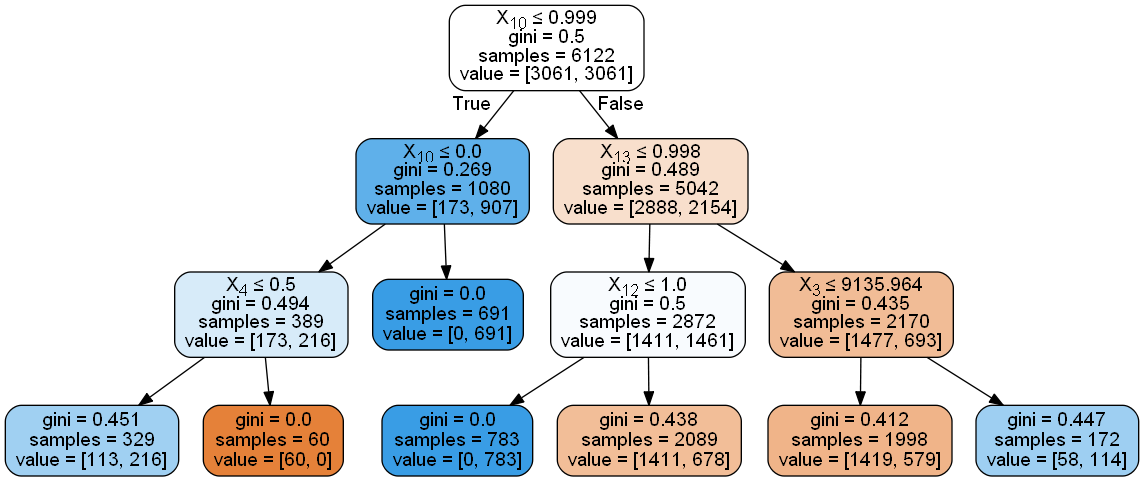

In [264]:
#Vamos a dibujar el modelo
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_tree, out_file=dot_data,filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [215]:
clf_tree.feature_importances_

array([0.        , 0.00440557, 0.0315363 , 0.06269855, 0.        ,
       0.03729408, 0.        , 0.        , 0.        , 0.0033754 ,
       0.34211292, 0.        , 0.51857718, 0.        , 0.        ,
       0.        ])

In [163]:
clf_tree.classes_

array([0, 1], dtype=int64)

In [223]:
unique(pd.DataFrame(clf_tree.predict_proba(X_test)))

array([0.        , 0.28978979, 0.3245572 , 0.3372093 , 0.34346505,
       0.65653495, 0.6627907 , 0.6754428 , 0.71021021, 1.        ])

# Vamos a probar con Cross-Validation y GridSearch

In [237]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf_tree,X,y,cv=10,scoring="precision")

array([0.28571429, 0.45454545, 0.32      , 1.        , 0.39285714,
       0.66666667, 0.18181818, 0.4       , 0.        , 0.5       ])

In [250]:
from sklearn.model_selection import GridSearchCV
grid = {'max_depth': [2,3,4,5,6,7,8,9,10],'min_samples_leaf': [5,10,15,20,25,30]}
clf_tree_grid=GridSearchCV(DecisionTreeClassifier(),grid,cv=7,scoring="precision")
clf_tree_grid.fit(X,y)

print("tuned hpyerparameters :(best parameters) ",clf_tree_grid.best_params_)
print("precision :",clf_tree_grid.best_score_)

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: U

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: U

tuned hpyerparameters :(best parameters)  {'max_depth': 3, 'min_samples_leaf': 5}
precision : 0.6159901234567902


In [249]:
print("tuned hpyerparameters :(best parameters) ",clf_tree_grid.best_params_)
print("precision :",clf_tree_grid.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 3, 'min_samples_leaf': 5}
precision : 0.6637925925925926
